## Data Wrangling - Group 49
### Impact of Parent’s Income and Education on Child’s Educational Performance

* [Hana Cosip, 2729233]
* [Hao Yu Wang, 2666479]
* [Sam Hoornaert, 2671158]
* [Senna Lindner, 2728446]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
from IPython.display import display
import seaborn as sns

delimiter = ','

file = 'graduation_rate.csv'
df = pd.read_csv(file, delimiter=delimiter)
display(df.head())

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


Average ACT scores: 28.61
Max ACT score: 36 With indexes: Int64Index([514, 641], dtype='int64')
Min ACT scores: 20


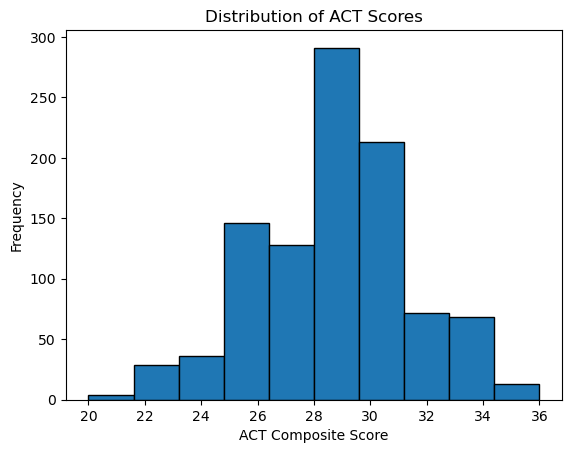

In [2]:
#ACT SCORES

avg_ACT = df['ACT composite score'].mean().round(2)
print("Average ACT scores:", avg_ACT)

max_ACT = df['ACT composite score'].max()
index_max_ACT = df[df['ACT composite score'] == max_ACT].index
print("Max ACT score:", max_ACT, "With indexes:", index_max_ACT)

min_ACT = df['ACT composite score'].min()
print("Min ACT scores:", min_ACT)


plt.hist(df['ACT composite score'], edgecolor='black')
plt.xlabel('ACT Composite Score')
plt.ylabel('Frequency')
plt.title('Distribution of ACT Scores')
plt.show()

Average SAT scores: 1999.91
Max SAT score: 2385
Min SAT scores: 1598


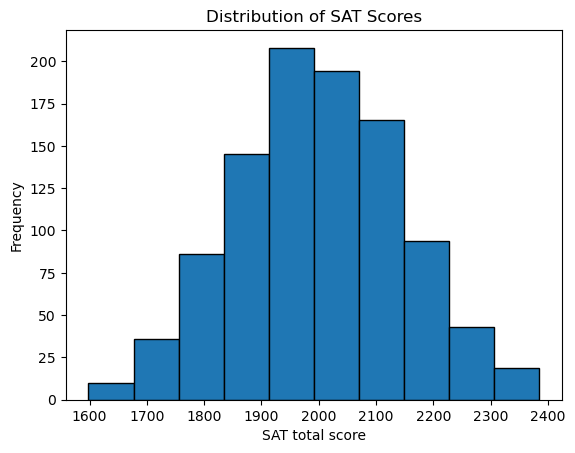

In [3]:
#SAT SCORES

avg_SAT = df['SAT total score'].mean().round(2)
print("Average SAT scores:", avg_SAT)

max_SAT = df['SAT total score'].max()
print("Max SAT score:", max_SAT)

min_SAT = df['SAT total score'].min()
print("Min SAT scores:", min_SAT)

plt.hist(df['SAT total score'], edgecolor='black')
plt.xlabel('SAT total score')
plt.ylabel('Frequency')
plt.title('Distribution of SAT Scores')
plt.show()

Average parental income: 67377.85
Max parental income: 124470
Min parental income: 18906


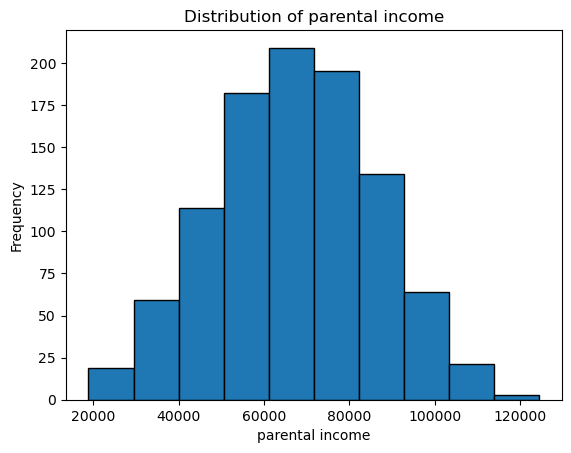

In [4]:
#PARENTAL INCOME

avg_par_income = df['parental income'].mean().round(2)
print("Average parental income:", avg_par_income)

max_par_income = df['parental income'].max()
print("Max parental income:", max_par_income)

min_par_income = df['parental income'].min()
print("Min parental income:", min_par_income)

plt.hist(df['parental income'], edgecolor='black')
plt.xlabel('parental income')
plt.ylabel('Frequency')
plt.title('Distribution of parental income')
plt.show()

Average high shool GPA: 3.71
Max high shool GPA: 4.0
Min high shool GPA: 2.8


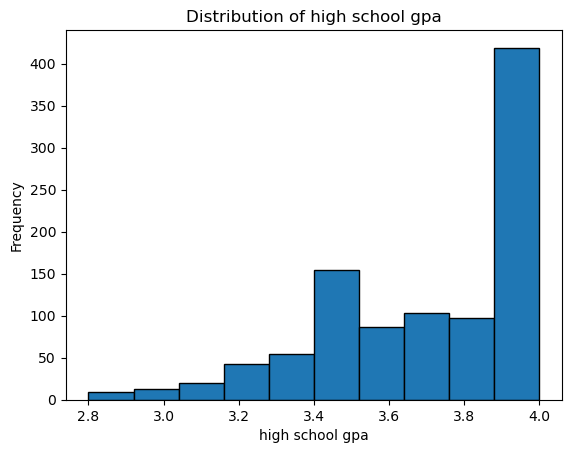

In [5]:
#HIGH SCHOOL GPA

avg_GPA_HS = df['high school gpa'].mean().round(2)
print("Average high shool GPA:", avg_GPA_HS)

max_GPA_HS = df['high school gpa'].max()
print("Max high shool GPA:", max_GPA_HS)

min_GPA_HS = df['high school gpa'].min()
print("Min high shool GPA:", min_GPA_HS)

plt.hist(df['high school gpa'], edgecolor='black')
plt.xlabel('high school gpa')
plt.ylabel('Frequency')
plt.title('Distribution of high school gpa')
plt.show()

Average college GPA: 3.38
Max college GPA: 4.0
Min college GPA: 2.6


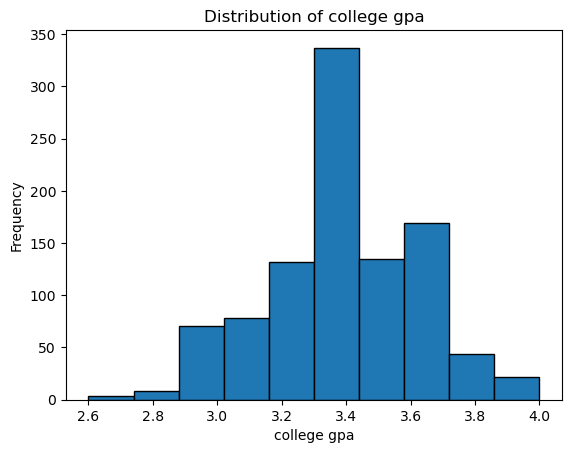

In [6]:
#COLLEGE GPA

avg_GPA_COL = df['college gpa'].mean().round(2)
print("Average college GPA:", avg_GPA_COL)

max_GPA_COL = df['college gpa'].max()
print("Max college GPA:", max_GPA_COL)

min_GPA_COL = df['college gpa'].min()
print("Min college GPA:", min_GPA_COL)

plt.hist(df['college gpa'], edgecolor='black')
plt.xlabel('college gpa')
plt.ylabel('Frequency')
plt.title('Distribution of college gpa')
plt.show()

Average graduate years: 4.98
Max graduate years: 10
Min graduate years: 3


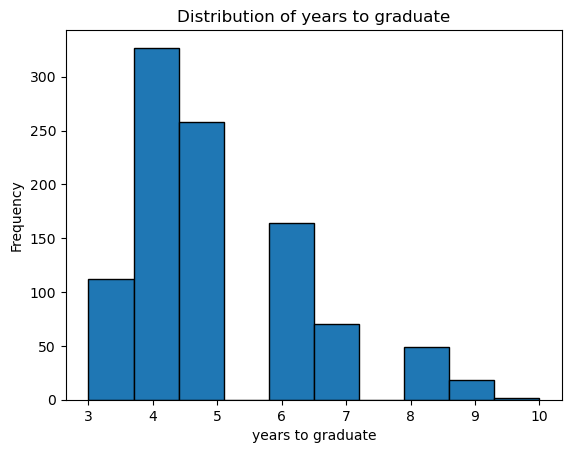

In [7]:
#GRADUATING YEARS

grad_years = df['years to graduate'].mean().round(2)
print("Average graduate years:", grad_years)

max_grad_years = df['years to graduate'].max()
print("Max graduate years:", max_grad_years)

min_grad_years = df['years to graduate'].min()
print("Min graduate years:", min_grad_years)

plt.hist(df['years to graduate'], edgecolor='black')
plt.xlabel('years to graduate')
plt.ylabel('Frequency')
plt.title('Distribution of years to graduate')
plt.show()

In [8]:
#PARENT'S EDUCATION 

education_types = df.groupby('parental level of education')

#for group_name, group_data in education_types:
 #   print(f"Group: {group_name}")
 #   print(group_data)
 #   print("\n")
    
education_counts = df['parental level of education'].value_counts()

#high_school = df[df['parental level of education'] == "high school"]
#avg_high_school_sat = high_school['SAT total score'].mean()
print(education_counts)

some college          232
high school           207
some high school      180
associate's degree    176
bachelor's degree     124
master's degree        81
Name: parental level of education, dtype: int64


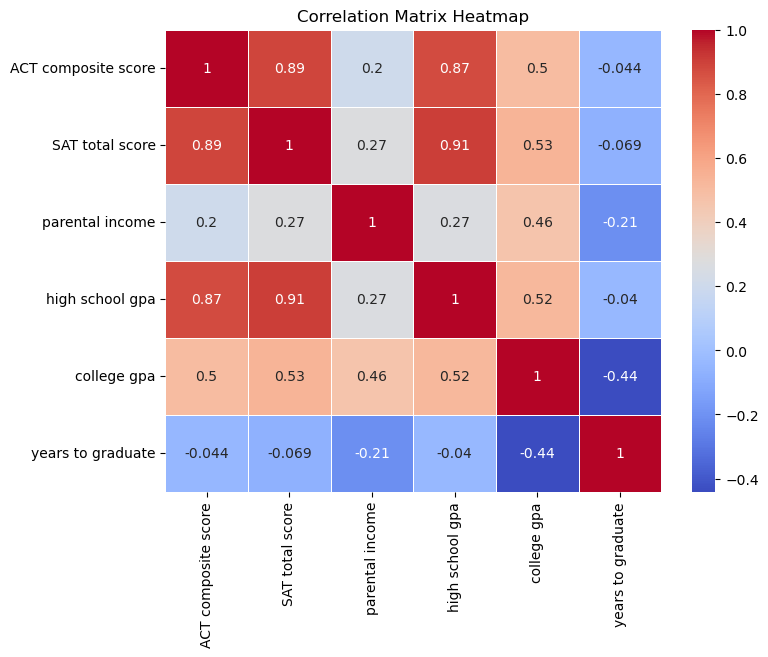

In [9]:
# CORRELATION MATRIX
# exclude parent education form dataframe:
df2 = df.drop(columns=["parental level of education"])
correlation_matrix = df2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
#OUTLIERS MEAN, STDV AND Z-SCORE

mean = df2.mean()
#print(mean)
stdv = df2.std()
#print(std_dev)

num_stdv = 3  

lower_threshold = mean - num_stdv * stdv
upper_threshold = mean + num_stdv * stdv

outliers = ((df2 < lower_threshold) | (df2 > upper_threshold)).any(axis=1)

print(df[outliers])

#Calculated the standard deviation and the mean in order to find the students 
#that are outliers 

     ACT composite score  SAT total score parental level of education  \
240                   21             1640            some high school   
367                   28             2097             master's degree   
454                   22             1598                some college   
520                   21             1628            some high school   
564                   24             1739            some high school   
673                   20             1608            some high school   
691                   25             1722            some high school   
772                   20             1694          associate's degree   
995                   32             2234                some college   

     parental income  high school gpa  college gpa  years to graduate  
240            54847              2.8          3.4                  3  
367           124470              3.9          3.6                  7  
454            73060              2.8          3.0   

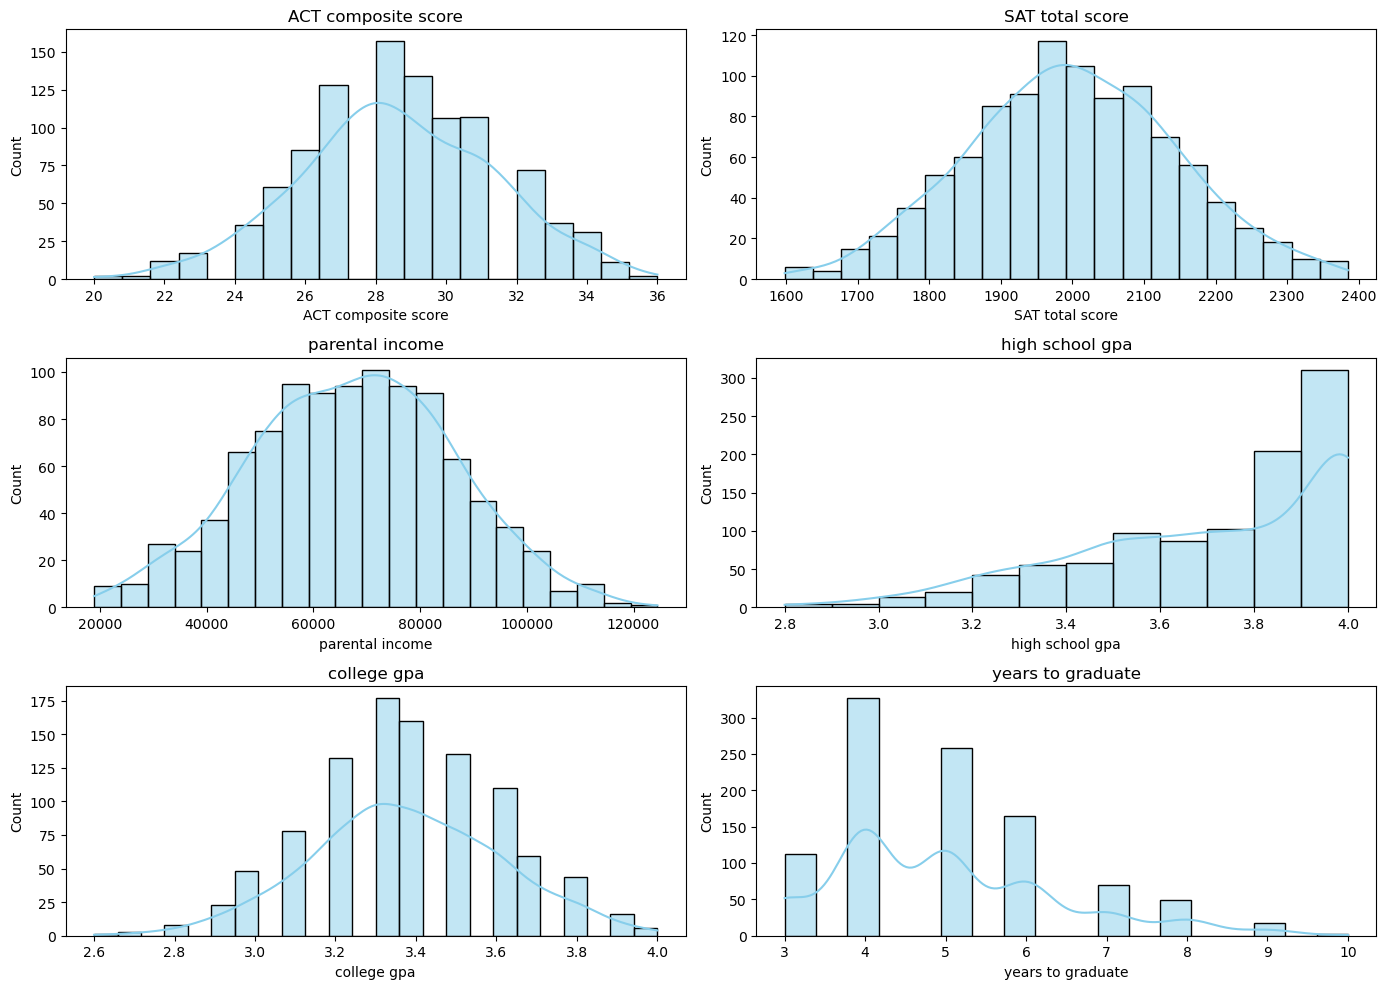

In [11]:
#DISTRIBUTION OF THE DATASET

numerical_columns = ['ACT composite score', 'SAT total score', 'parental income',
                     'high school gpa', 'college gpa', 'years to graduate']

plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

#Made a histogram to find the distribution of the dataset, it mostly seems to
#have a normal distribution, except for the high school GPA and the years to 
#graduate 

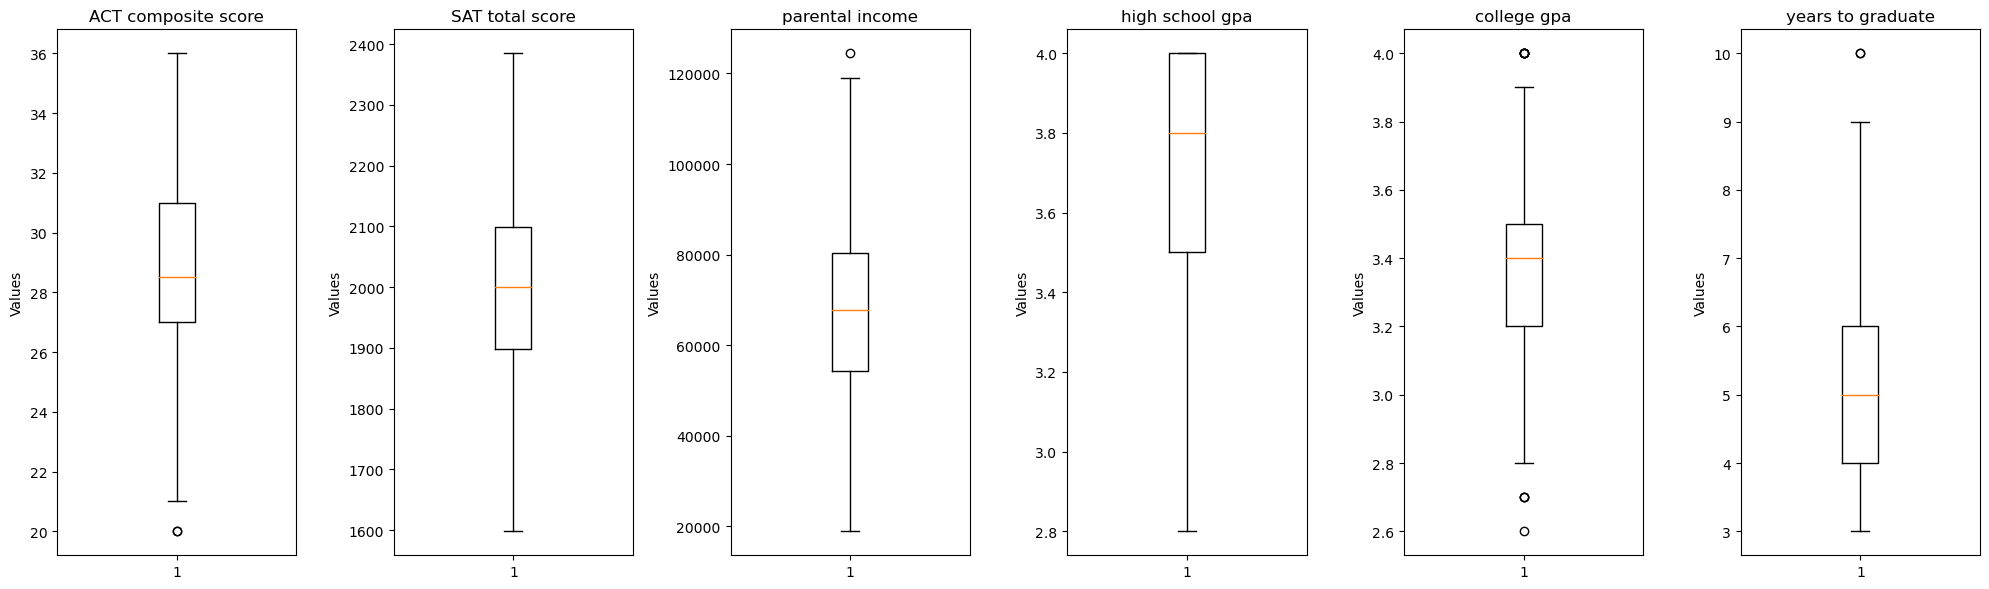

In [12]:
#OUTLIERS IN BOXPLOTS 

numerical_columns = ['ACT composite score', 'SAT total score', 'parental income',
                     'high school gpa', 'college gpa', 'years to graduate']

fig, axes = plt.subplots(1, len(numerical_columns), figsize=(20, 6))

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

#The boxplots show that both SAT scores and high school GPA have no outliers, 
#on the contrary of college GPA, which has outliers both the upperside and under


In [13]:
outliers = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    outliers[column] = column_outliers

for column, values in outliers.items():
    print(f"Outliers in column '{column}':\n{values}\n")
    
#Here the outliers from the boxplots are extracted and pointed out, in case we
#want to sobstract them from te dataset in order to do further explorations 

Outliers in column 'ACT composite score':
673    20
772    20
Name: ACT composite score, dtype: int64

Outliers in column 'SAT total score':
Series([], Name: SAT total score, dtype: int64)

Outliers in column 'parental income':
367    124470
Name: parental income, dtype: int64

Outliers in column 'high school gpa':
Series([], Name: high school gpa, dtype: float64)

Outliers in column 'college gpa':
49     4.0
134    2.7
247    4.0
256    4.0
564    2.6
632    4.0
673    2.7
691    2.7
873    4.0
902    4.0
Name: college gpa, dtype: float64

Outliers in column 'years to graduate':
691    10
995    10
Name: years to graduate, dtype: int64



In [14]:
#OUTLIERS IN PARENTAL EDUCATION 

education_counts = df['parental level of education'].value_counts()
print(education_counts)

#Results show that only 8,1% of the parents have a master's degree, and the
#mayority of the parents have some college degree or something higher than 
#high school 

some college          232
high school           207
some high school      180
associate's degree    176
bachelor's degree     124
master's degree        81
Name: parental level of education, dtype: int64


Display descriptive statistics for numerical columns


,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,28.607000,1999.906000,67377.85200,3.707400,3.376500,4.982000
std,2.774211,145.078361,18827.33105,0.287381,0.237179,1.414099
min,20.000000,1598.000000,18906.00000,2.800000,2.600000,3.000000
25%,27.000000,1898.000000,54269.75000,3.500000,3.200000,4.000000
50%,28.500000,2000.000000,67842.50000,3.800000,3.400000,5.000000
75%,31.000000,2099.000000,80465.50000,4.000000,3.500000,6.000000
max,36.000000,2385.000000,124470.00000,4.000000,4.000000,10.000000


 Count of different degrees


some college          232
high school           207
some high school      180
associate's degree    176
bachelor's degree     124
master's degree        81
Name: parental level of education, dtype: int64

Calculate the correlation matrix


/var/folders/3d/64fzcd755ll_3pck6975rqcr0000gn/T/ipykernel_31991/4228976371.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


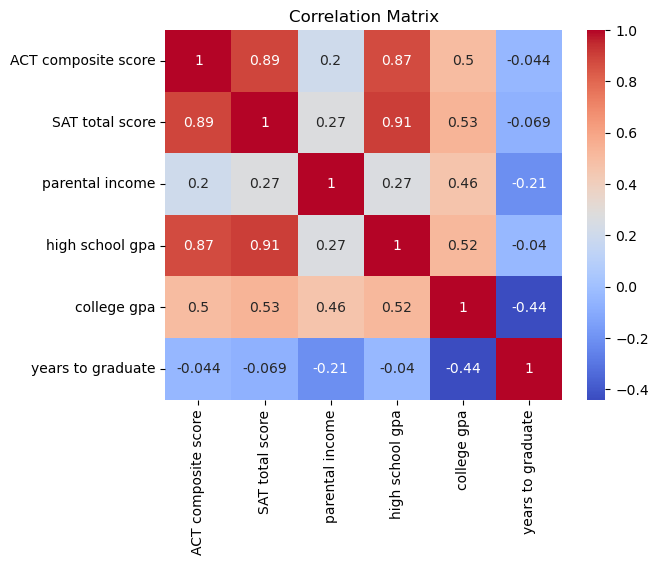

 Box plot for ACT composite score 


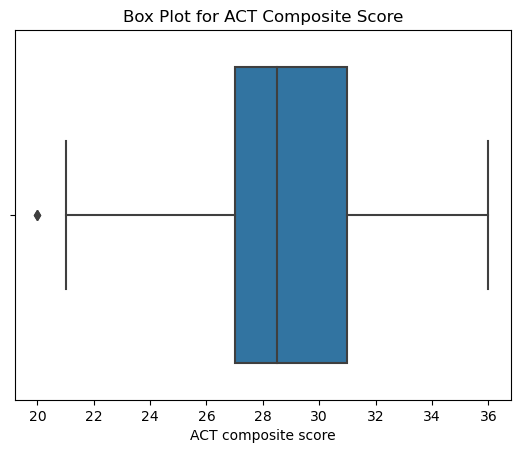

 Average years to graduate for each parental education level


parental level of education
associate's degree    4.875000
bachelor's degree     4.806452
high school           5.173913
master's degree       4.518519
some college          4.922414
some high school      5.272222
Name: years to graduate, dtype: float64

In [15]:
print ('Display descriptive statistics for numerical columns')
numerical_stats = df.describe()
display(numerical_stats)

print (' Count of different degrees')
degree_counts = df['parental level of education'].value_counts()
display(degree_counts)

print ('Calculate the correlation matrix')
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print (' Box plot for ACT composite score ')
sns.boxplot(x=df['ACT composite score'])
plt.title('Box Plot for ACT Composite Score')
plt.show()

print(' Average years to graduate for each parental education level')
avg_years_by_education = df.groupby('parental level of education')['years to graduate'].mean()
display(avg_years_by_education)

# Visualizations

## 1. Pie chart for Parent's Income Distribution

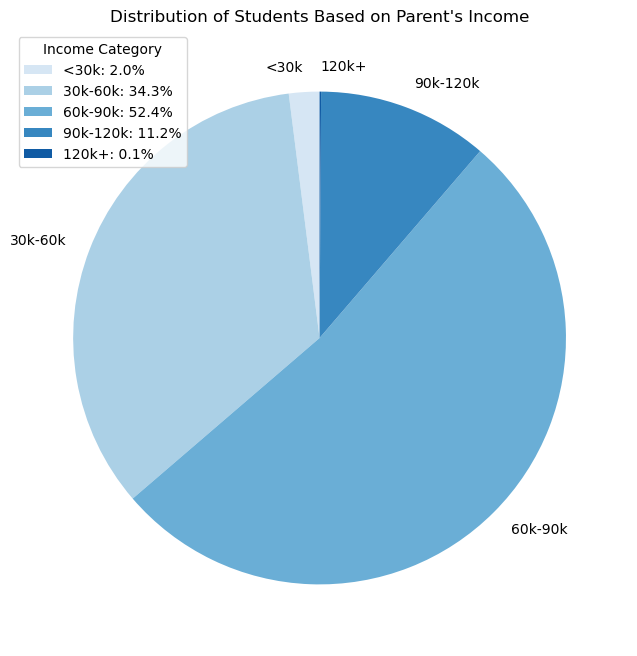

In [16]:
color_palette = sns.color_palette('Blues', n_colors=5)  # Assuming 5 income labels
income_labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+']

# Assuming you have created the 'income_category' column correctly
df['income_category'] = pd.cut(df['parental income'], bins=[0, 30000, 60000, 90000, 120000, np.inf], labels=income_labels, right=False)

# Pie chart for Parent's Income Distribution
plt.figure(figsize=(8, 8))
income_category_counts = df['income_category'].value_counts()
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+']  # Specify the order
sizes = [income_category_counts[label] for label in labels]
colors = [color_palette[i] for i in range(len(income_labels))]

plt.pie(sizes, labels=labels, startangle=90, colors=colors)
plt.title('Distribution of Students Based on Parent\'s Income')

# Adding legend with percentages directly using list comprehension
percentages = [round((size / sum(sizes)) * 100, 1) for size in sizes]
legend_labels = [f"{label}: {percent}%" for label, percent in zip(labels, percentages)]
plt.legend(legend_labels, title='Income Category', loc='upper left')

plt.show()


## 2. Pie chart for Parent's Education Distributio

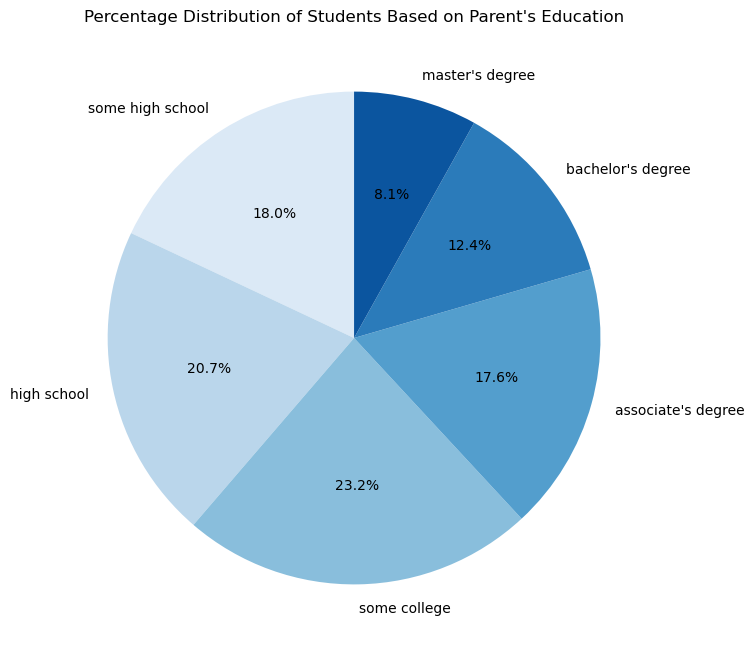

In [17]:
# Assuming you already have edu_counts calculated somewhere in your code
edu_counts = df['parental level of education'].value_counts()

# Reorder the edu_counts Series
ordered_labels = ['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
edu_counts = edu_counts.reindex(ordered_labels)

# Define a custom color palette
colors = sns.color_palette('Blues', n_colors=len(ordered_labels))

# Create the pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(edu_counts, labels=ordered_labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage Distribution of Students Based on Parent\'s Education')
plt.show()

## 3. Parent's Income vs. Child's College GPA:

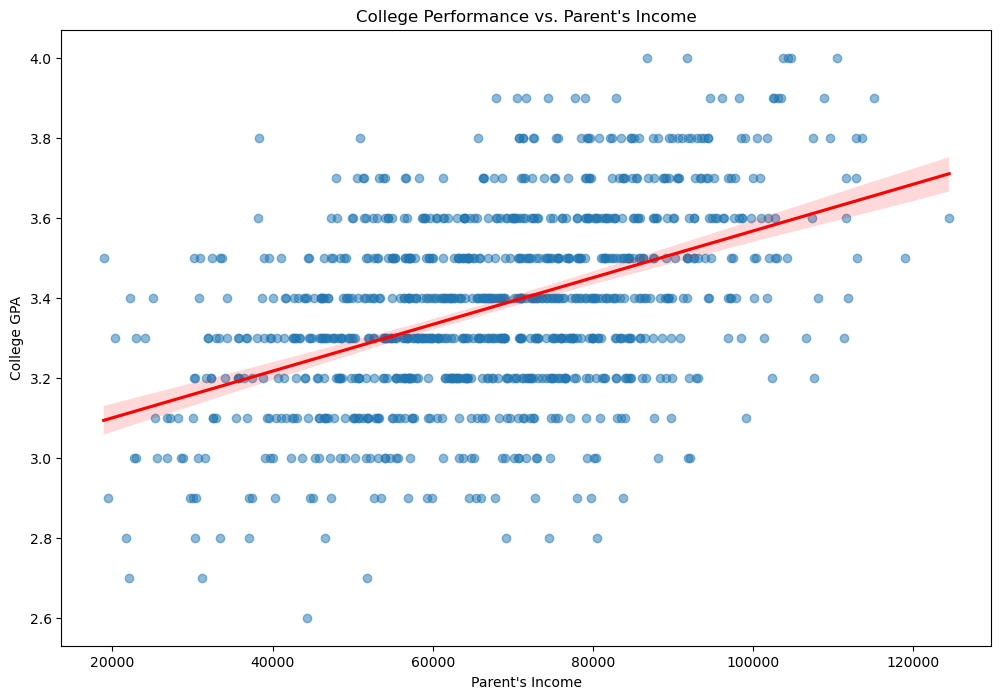

In [18]:
plt.figure(figsize=(12, 8))
sns.regplot(x='parental income', y='college gpa', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title("College Performance vs. Parent's Income")
plt.xlabel("Parent's Income")
plt.ylabel("College GPA")
plt.show()

## 4. Parent's Education vs. Child's College GPA:

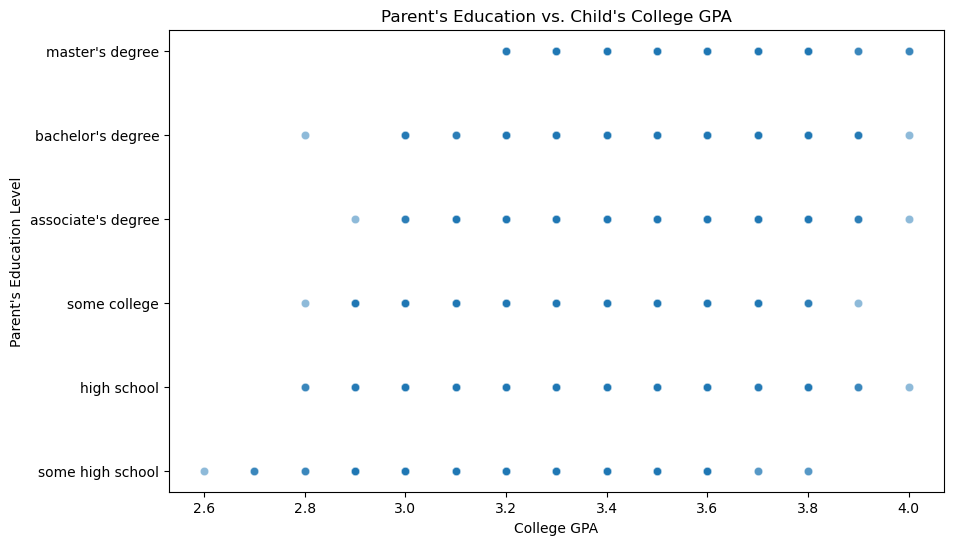

In [19]:
plt.figure(figsize=(10, 6))

# Change the order of education levels to go from "master's degree" to "some college"
education_order = [
    "master's degree",
    "bachelor's degree",
    "associate's degree",
    "some college",
    "high school",
    "some high school"
]

# Create a Categorical data type with custom order for the y-axis
education_cat = pd.Categorical(df['parental level of education'], categories=education_order, ordered=True)

# Use Seaborn scatterplot with the specified order for the y-axis
sns.scatterplot(x='college gpa', y=education_cat, data=df, alpha=0.5)

plt.title("Parent's Education vs. Child's College GPA")
plt.xlabel("College GPA")
plt.ylabel("Parent's Education Level")
plt.show()


## 5. Parent's Income vs. Number of Years to Graduate:

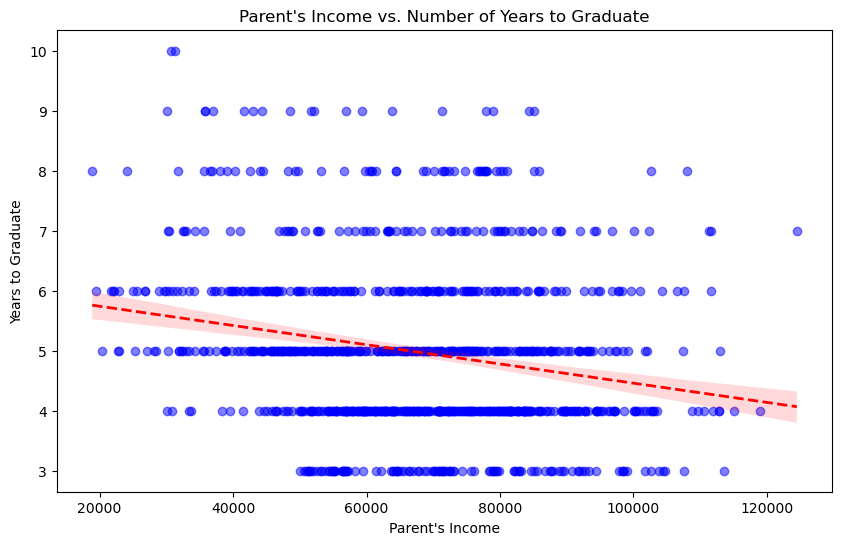

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='parental income', y='years to graduate', data=df, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red', 'linestyle':'--', 'linewidth':2})

plt.title("Parent's Income vs. Number of Years to Graduate")
plt.xlabel("Parent's Income")
plt.ylabel("Years to Graduate")
plt.show()

## 8. College GPA Across Different Levels of Parent's Income:

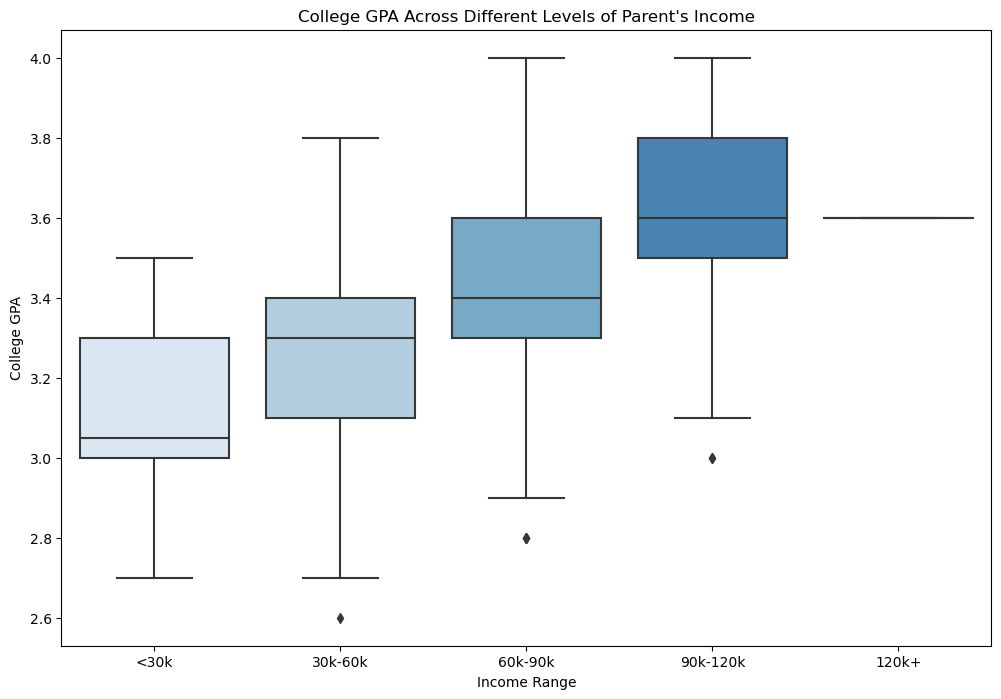

In [21]:
# Assuming 'parental income' is a numerical column
df['income_range'] = pd.cut(df['parental income'],
                            bins=[-np.inf, 30000, 60000, 90000, 120000, np.inf],
                            labels=['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+'], right=False)

plt.figure(figsize=(12, 8))
income_order = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k+']
sns.boxplot(x='income_range', y='college gpa', data=df, order=income_order, palette=sns.color_palette("Blues", n_colors=len(income_order)))
plt.title("College GPA Across Different Levels of Parent's Income")
plt.xlabel("Income Range")
plt.ylabel("College GPA")
plt.show()

## 9. College GPA Across Different Levels of Parent's Education:

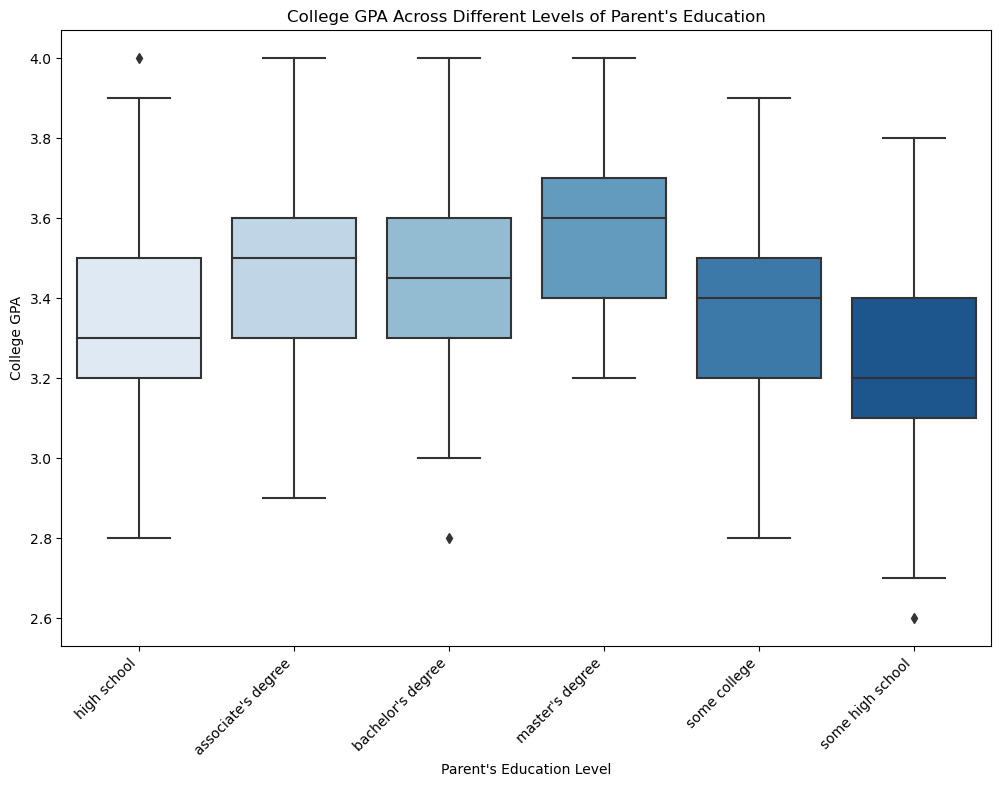

In [22]:
plt.figure(figsize=(12, 8))

# Define the order of colors from lightest to darkest shade of blue
color_order = sns.color_palette("Blues", n_colors=len(df['parental level of education'].unique())).as_hex()

sns.boxplot(x='parental level of education', y='college gpa', data=df, palette=color_order)
plt.title("College GPA Across Different Levels of Parent's Education")
plt.xlabel("Parent's Education Level")
plt.ylabel("College GPA")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## Prediction model using Linear Regression

Simple Linear Regression will be used to explore parental income / parental level of education and use it to predict child's educational performance (college gpa / SAT total score / Years to Graduate)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
delimiter = ","
file = "graduation_rate.csv"
df = pd.read_csv(file, delimiter=delimiter)

# Map the 'parental level of education' to numerical values
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 4,
    "associate's degree": 3,
    "bachelor's degree": 5,
    "master's degree": 6,
}

df["parental level of education"] = df["parental level of education"].map(
    education_mapping
)

### 1. BOTH INCOME & PARENTAL LEVEL OF EDUCATION

In [24]:
# Define features and target variables
X_gpa = df[["parental income", "parental level of education"]]
y_gpa = df["college gpa"]

X_sat = df[["parental income", "parental level of education"]]
y_sat = df["SAT total score"]

X_years = df[["parental income", "parental level of education"]]
y_years = df["years to graduate"]

# Split the data into training and testing sets
X_train_gpa, X_test_gpa, y_train_gpa, y_test_gpa = train_test_split(
    X_gpa, y_gpa, test_size=0.2, random_state=42
)
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42
)
X_train_years, X_test_years, y_train_years, y_test_years = train_test_split(
    X_years, y_years, test_size=0.2, random_state=42
)

In [25]:
# Create linear regression models
model_gpa = LinearRegression()
model_sat = LinearRegression()
model_years = LinearRegression()

# Train the models
model_gpa.fit(X_train_gpa, y_train_gpa)
model_sat.fit(X_train_sat, y_train_sat)
model_years.fit(X_train_years, y_train_years)

# Make predictions
y_pred_gpa = model_gpa.predict(X_test_gpa)
y_pred_sat = model_sat.predict(X_test_sat)
y_pred_years = model_years.predict(X_test_years)

In [26]:
# Evaluate the models
mse_gpa = mean_squared_error(y_test_gpa, y_pred_gpa)
r2_gpa = r2_score(y_test_gpa, y_pred_gpa)

mse_sat = mean_squared_error(y_test_sat, y_pred_sat)
r2_sat = r2_score(y_test_sat, y_pred_sat)

mse_years = mean_squared_error(y_test_years, y_pred_years)
r2_years = r2_score(y_test_years, y_pred_years)

### 2. ONLY PARENTAL INCOME

In [27]:
# Define features and target variables
X_gpa = df[["parental income"]]
y_gpa = df["college gpa"]

X_sat = df[["parental income"]]
y_sat = df["SAT total score"]

X_years = df[["parental income"]]
y_years = df["years to graduate"]

# Split the data into training and testing sets
X_train_gpa, X_test_gpa, y_train_gpa, y_test_gpa = train_test_split(
    X_gpa, y_gpa, test_size=0.2, random_state=42
)
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42
)
X_train_years, X_test_years, y_train_years, y_test_years = train_test_split(
    X_years, y_years, test_size=0.2, random_state=42
)

In [28]:
# Create linear regression models
model_gpa_income = LinearRegression()
model_sat_income = LinearRegression()
model_years_income = LinearRegression()

# Train the models
model_gpa_income.fit(X_train_gpa, y_train_gpa)
model_sat_income.fit(X_train_sat, y_train_sat)
model_years_income.fit(X_train_years, y_train_years)

# Make predictions
y_pred_gpa_income = model_gpa_income.predict(X_test_gpa)
y_pred_sat_income = model_sat_income.predict(X_test_sat)
y_pred_years_income = model_years_income.predict(X_test_years)

In [29]:
# Evaluate the models
mse_gpa_income = mean_squared_error(y_test_gpa, y_pred_gpa_income)
r2_gpa_income = r2_score(y_test_gpa, y_pred_gpa_income)

mse_sat_income = mean_squared_error(y_test_sat, y_pred_sat_income)
r2_sat_income = r2_score(y_test_sat, y_pred_sat_income)

mse_years_income = mean_squared_error(y_test_years, y_pred_years_income)
r2_years_income = r2_score(y_test_years, y_pred_years_income)

### 3. ONLY PARENTAL LEVEL OF EDUCATION

In [30]:
# Define features and target variables
X_gpa = df[["parental level of education"]]
y_gpa = df["college gpa"]

X_sat = df[["parental level of education"]]
y_sat = df["SAT total score"]

X_years = df[["parental level of education"]]
y_years = df["years to graduate"]

# Split the data into training and testing sets
X_train_gpa, X_test_gpa, y_train_gpa, y_test_gpa = train_test_split(
    X_gpa, y_gpa, test_size=0.2, random_state=42
)
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42
)
X_train_years, X_test_years, y_train_years, y_test_years = train_test_split(
    X_years, y_years, test_size=0.2, random_state=42
)

In [31]:
# Create linear regression models
model_gpa_edu = LinearRegression()
model_sat_edu = LinearRegression()
model_years_edu = LinearRegression()

# Train the models
model_gpa_edu.fit(X_train_gpa, y_train_gpa)
model_sat_edu.fit(X_train_sat, y_train_sat)
model_years_edu.fit(X_train_years, y_train_years)

# Make predictions
y_pred_gpa_edu = model_gpa_edu.predict(X_test_gpa)
y_pred_sat_edu = model_sat_edu.predict(X_test_sat)
y_pred_years_edu = model_years_edu.predict(X_test_years)

In [32]:
# Evaluate the models
mse_gpa_edu = mean_squared_error(y_test_gpa, y_pred_gpa_edu)
r2_gpa_edu = r2_score(y_test_gpa, y_pred_gpa_edu)

mse_sat_edu = mean_squared_error(y_test_sat, y_pred_sat_edu)
r2_sat_edu = r2_score(y_test_sat, y_pred_sat_edu)

mse_years_edu = mean_squared_error(y_test_years, y_pred_years_edu)
r2_years_edu = r2_score(y_test_years, y_pred_years_edu)

## PLOTTING RESULTS for Linear Regression

In [33]:
# Print evaluation metrics for BOTH
print("\nEvaluation metrics for BOTH parent income & education")

print(f"\tCollege GPA Model - Mean Squared Error: {mse_gpa:.2f}, R-squared: {r2_gpa:.2f}")
print(
    f"\tSAT Scores Model - Mean Squared Error: {mse_sat:.2f}, R-squared: {r2_sat:.2f}"
)
print(
    f"\tYears to Graduate Model - Mean Squared Error: {mse_years:.2f}, R-squared: {r2_years:.2f}"
)

# Print evaluation metrics for INCOME ONLY
print("\nEvaluation metrics for parent income ONLY\n")

print(
    f"\tCollege GPA Model - Mean Squared Error: {mse_gpa_income:.2f}, R-squared: {r2_gpa_income:.2f}"
)
print(
    f"\tSAT Scores Model - Mean Squared Error: {mse_sat_income:.2f}, R-squared: {r2_sat_income:.2f}"
)
print(
    f"\tYears to Graduate Model - Mean Squared Error: {mse_years_income:.2f}, R-squared: {r2_years_income:.2f}"
)

# Print evaluation metrics for EDUCATION ONLY
print("\nEvaluation metrics for parent education ONLY\n")

print(
    f"\tCollege GPA Model - Mean Squared Error: {mse_gpa_edu:.2f}, R-squared: {r2_gpa_edu:.2f}"
)
print(
    f"\tSAT Scores Model - Mean Squared Error: {mse_sat_edu:.2f}, R-squared: {r2_sat_edu:.2f}"
)
print(
    f"\tYears to Graduate Model - Mean Squared Error: {mse_years_edu:.2f}, R-squared: {r2_years_edu:.2f}"
)


Evaluation metrics for BOTH parent income & education
	College GPA Model - Mean Squared Error: 0.04, R-squared: 0.20
	SAT Scores Model - Mean Squared Error: 18963.94, R-squared: 0.13
	Years to Graduate Model - Mean Squared Error: 1.82, R-squared: 0.06

Evaluation metrics for parent income ONLY

	College GPA Model - Mean Squared Error: 0.04, R-squared: 0.21
	SAT Scores Model - Mean Squared Error: 21506.82, R-squared: 0.01
	Years to Graduate Model - Mean Squared Error: 1.82, R-squared: 0.06

Evaluation metrics for parent education ONLY

	College GPA Model - Mean Squared Error: 0.05, R-squared: 0.05
	SAT Scores Model - Mean Squared Error: 18692.46, R-squared: 0.14
	Years to Graduate Model - Mean Squared Error: 1.90, R-squared: 0.02


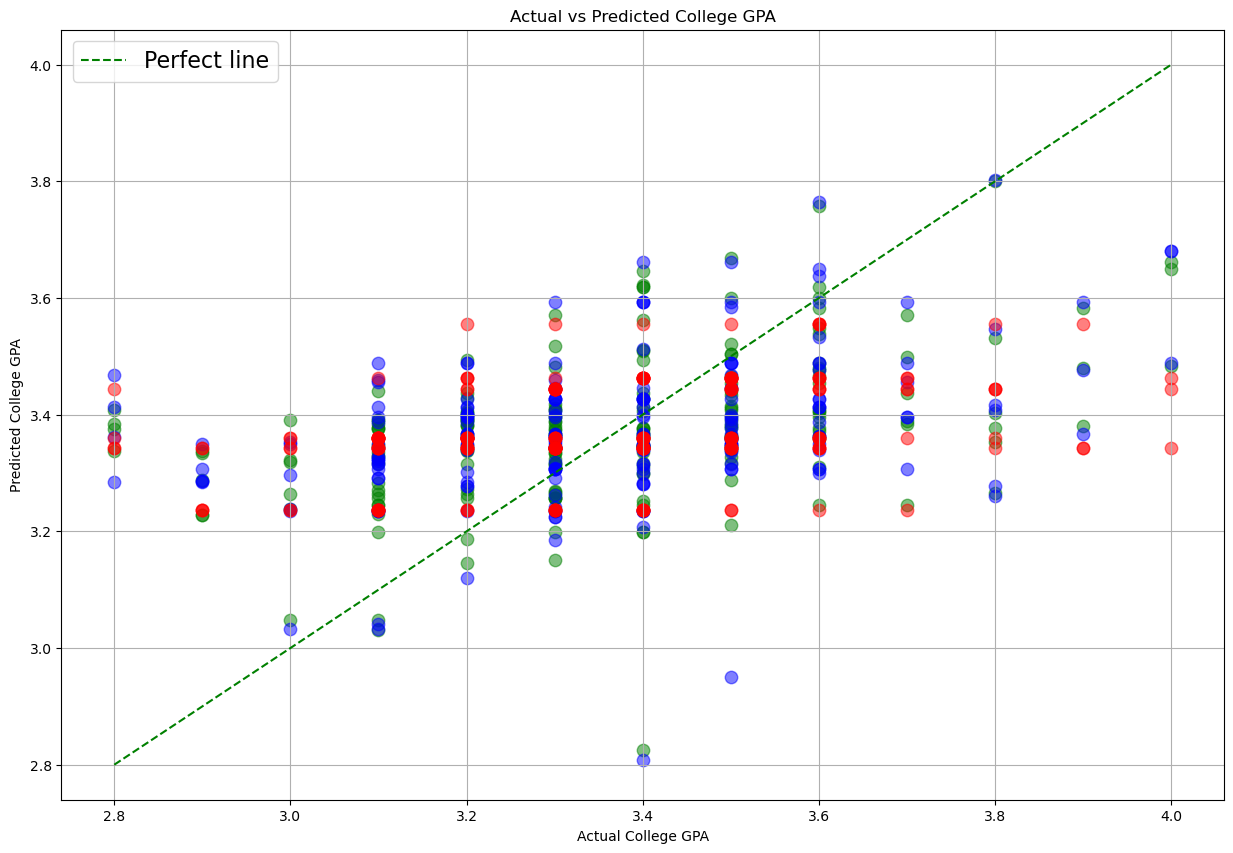

In [68]:
# Plot for College GPA
point_size = 80
marker = "o"
transparent = 0.5

plt.figure(figsize=(15, 10))
plt.scatter(
    y_test_gpa,
    y_pred_gpa,
    color="green",
    s=point_size,
    marker=marker,
    alpha=transparent,
)
plt.scatter(
    y_test_gpa,
    y_pred_gpa_income,
    color="blue",
    s=point_size,
    marker=marker,
    alpha=transparent,
)
plt.scatter(
    y_test_gpa,
    y_pred_gpa_edu,
    color="red",
    s=point_size,
    marker=marker,
    alpha=transparent,
)
plt.plot(
    [min(y_test_gpa), max(y_test_gpa)],
    [min(y_test_gpa), max(y_test_gpa)],
    color="green",
    linestyle="--",
    label = "Perfect line",
)
plt.xlabel("Actual College GPA")
plt.ylabel("Predicted College GPA")
plt.title("Actual vs Predicted College GPA")
plt.legend(loc="upper left", fontsize="16")
plt.grid(True)
plt.show()

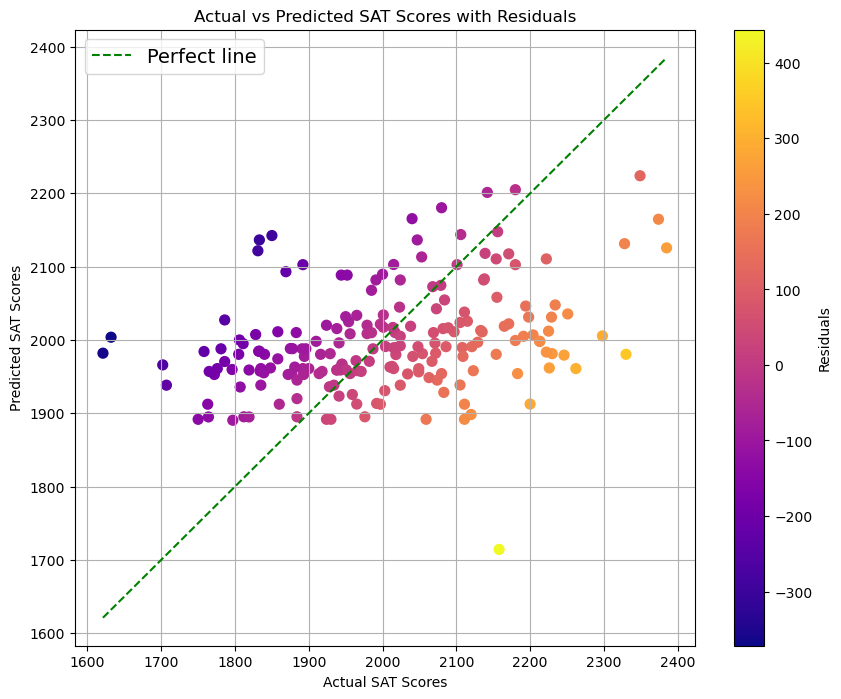

In [69]:
# Plot for SAT Scores
plt.figure(figsize=(10, 8))
plt.scatter(y_test_sat, y_pred_sat, c=y_test_sat - y_pred_sat, cmap='plasma', s=50)
plt.colorbar(label='Residuals')
plt.plot(
    [min(y_test_sat), max(y_test_sat)],
    [min(y_test_sat), max(y_test_sat)],
    color="green",
    linestyle="--",
    label = "Perfect line",
)
plt.xlabel("Actual SAT Scores")
plt.ylabel("Predicted SAT Scores")
plt.title("Actual vs Predicted SAT Scores with Residuals")
plt.legend(loc="upper left", fontsize="14")
plt.grid(True)
plt.show()

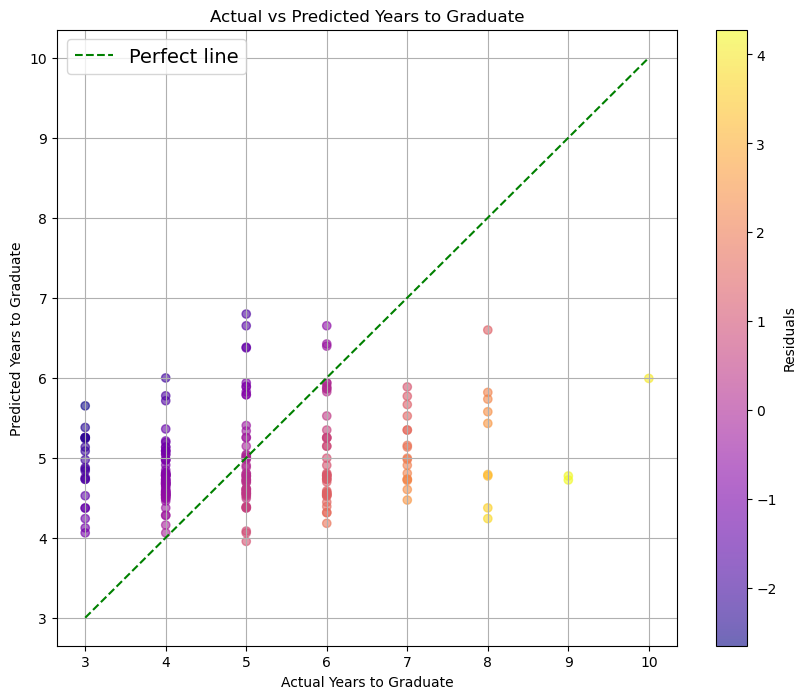

In [70]:
residuals = y_test_years - y_pred_years
plt.figure(figsize=(10, 8))
plt.scatter(y_test_years, y_pred_years, c=residuals, cmap='plasma', alpha=0.6)
plt.colorbar(label='Residuals')
plt.plot(
    [min(y_test_years), max(y_test_years)],
    [min(y_test_years), max(y_test_years)],
    color="green",
    linestyle="--",
    label = "Perfect line",
)
plt.xlabel("Actual Years to Graduate")
plt.ylabel("Predicted Years to Graduate")
plt.title("Actual vs Predicted Years to Graduate")
plt.legend(loc="upper left", fontsize="14")
plt.grid(True)
plt.show()

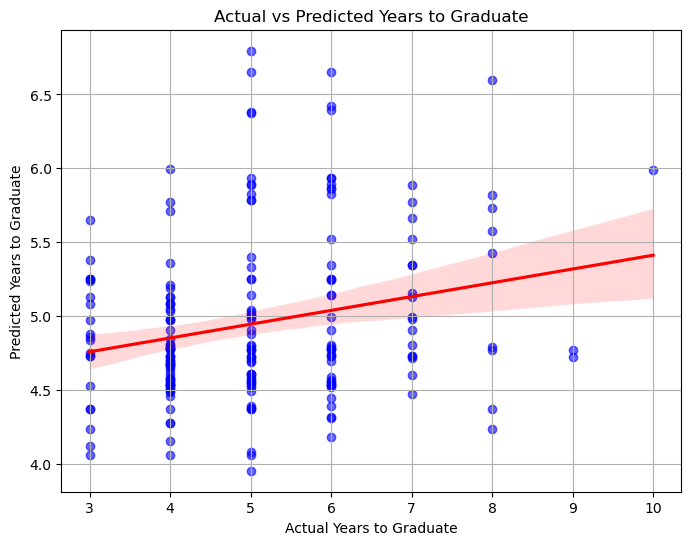

In [71]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_years, y=y_pred_years, scatter_kws={'color': 'blue', 'alpha':0.6}, line_kws={'color': 'red'})
plt.xlabel("Actual Years to Graduate")
plt.ylabel("Predicted Years to Graduate")
plt.title("Actual vs Predicted Years to Graduate")
plt.grid(True)
plt.show()

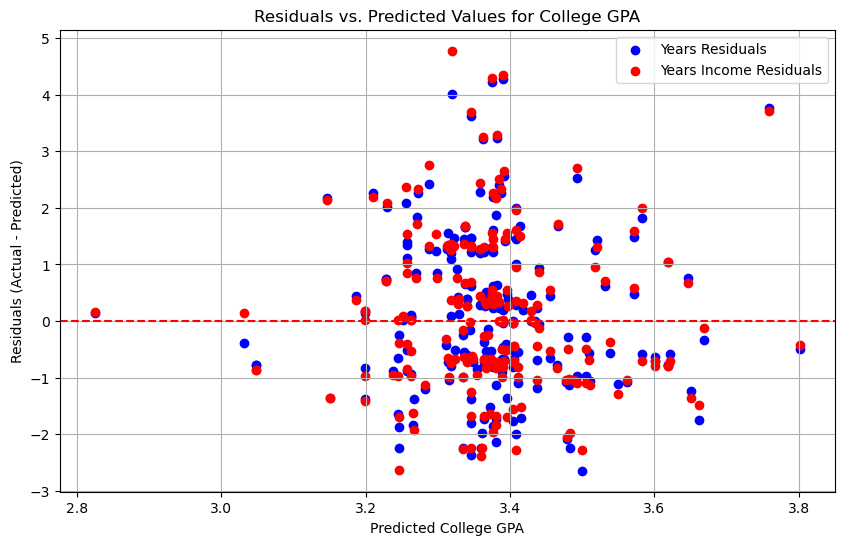

In [72]:
residuals_years = y_test_years - y_pred_years

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gpa, residuals_years, color="blue", label="Years Residuals")
plt.scatter(y_pred_gpa, residuals_years_income, color="red", label="Years Income Residuals")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted College GPA")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values for College GPA")
plt.legend()
plt.grid(True)

plt.show()


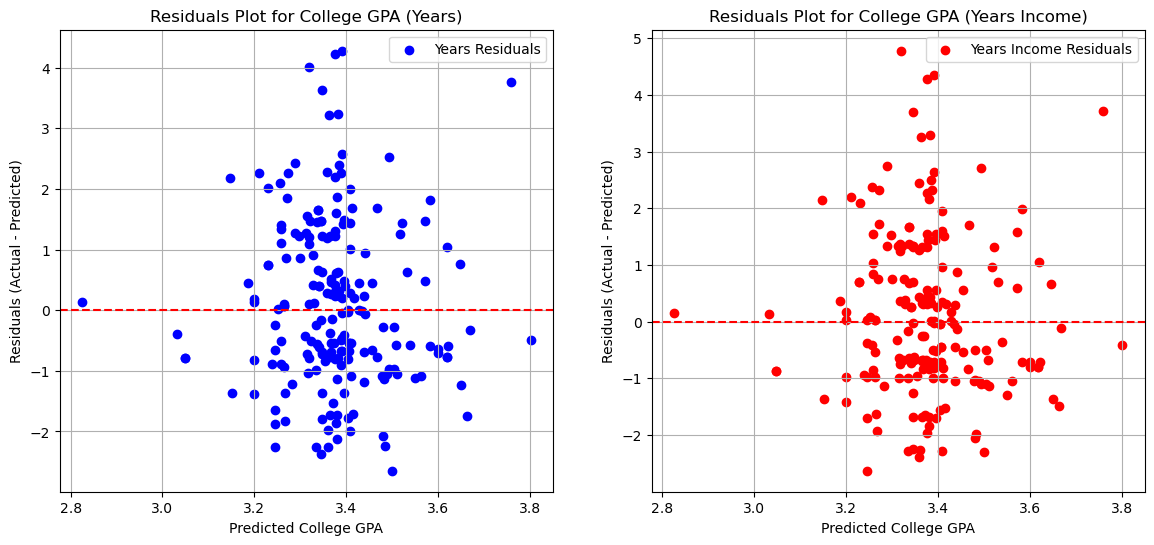

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(y_pred_gpa, residuals_years, color="blue", label="Years Residuals")
ax1.axhline(y=0, color="red", linestyle="--")
ax1.set_xlabel("Predicted College GPA")
ax1.set_ylabel("Residuals (Actual - Predicted)")
ax1.set_title("Residuals Plot for College GPA (Years)")
ax1.legend()
ax1.grid(True)

ax2.scatter(y_pred_gpa, residuals_years_income, color="red", label="Years Income Residuals")
ax2.axhline(y=0, color="red", linestyle="--")
ax2.set_xlabel("Predicted College GPA")
ax2.set_ylabel("Residuals (Actual - Predicted)")
ax2.set_title("Residuals Plot for College GPA (Years Income)")
ax2.legend()
ax2.grid(True)

plt.show()

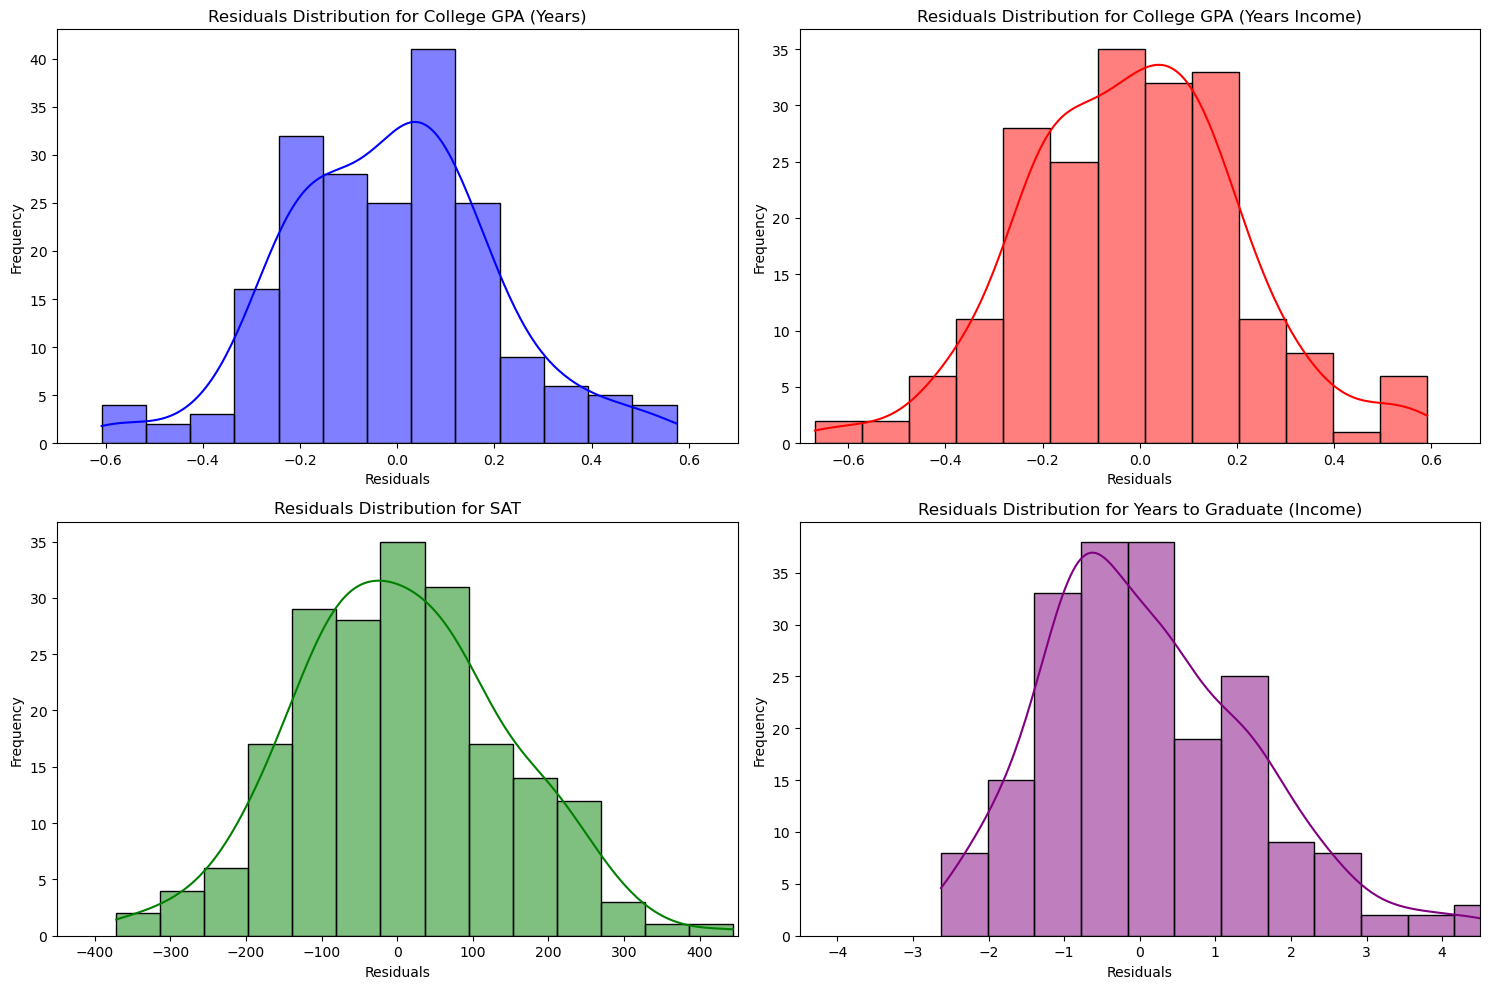

In [74]:
import seaborn as sns

residuals_gpa_income = y_test_gpa - y_pred_gpa_income

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(residuals_gpa, kde=True, color="blue")
plt.title("Residuals Distribution for College GPA (Years)")
plt.xlim(-0.7, 0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(residuals_gpa_income, kde=True, color="red")
plt.title("Residuals Distribution for College GPA (Years Income)")
plt.xlim(-0.7, 0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
sns.histplot(residuals_sat, kde=True, color="green")
plt.title("Residuals Distribution for SAT")
plt.xlim(-450, 450)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(residuals_years_income, kde=True, color="purple")
plt.title("Residuals Distribution for Years to Graduate (Income)")
plt.xlim(-4.5, 4.5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Prediction model using Gradient Boost Regression

Gradient Boost Regression will be used to explore parental income / parental level of education and use it to predict child's educational performance (college gpa / SAT total score / Years to Graduate)

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
delimiter = ","
file = "graduation_rate.csv"
df = pd.read_csv(file, delimiter=delimiter)

# Map the 'parental level of education' to numerical values
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 4,
    "associate's degree": 3,
    "bachelor's degree": 5,
    "master's degree": 6,
}

df["parental level of education"] = df["parental level of education"].map(
    education_mapping
)

### 1. BOTH INCOME & PARENTAL LEVEL OF EDUCATION

In [47]:
# Define features and target variables
X_gpa = df[["parental income", "parental level of education"]]
y_gpa = df["college gpa"]

X_sat = df[["parental income", "parental level of education"]]
y_sat = df["SAT total score"]

X_years = df[["parental income", "parental level of education"]]
y_years = df["years to graduate"]

# Split the data into training and testing sets
X_train_gpa, X_test_gpa, y_train_gpa, y_test_gpa = train_test_split(
    X_gpa, y_gpa, test_size=0.2, random_state=42
)
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42
)
X_train_years, X_test_years, y_train_years, y_test_years = train_test_split(
    X_years, y_years, test_size=0.2, random_state=42
)

In [48]:
model_gpa = GradientBoostingRegressor()
model_sat = GradientBoostingRegressor()
model_years = GradientBoostingRegressor()

# Train the models
model_gpa.fit(X_train_gpa, y_train_gpa)
model_sat.fit(X_train_sat, y_train_sat)
model_years.fit(X_train_years, y_train_years)

# Make predictions
y_pred_gpa = model_gpa.predict(X_test_gpa)
y_pred_sat = model_sat.predict(X_test_sat)
y_pred_years = model_years.predict(X_test_years)

In [49]:
# Evaluate the models
mse_gpa = mean_squared_error(y_test_gpa, y_pred_gpa)
r2_gpa = r2_score(y_test_gpa, y_pred_gpa)

mse_sat = mean_squared_error(y_test_sat, y_pred_sat)
r2_sat = r2_score(y_test_sat, y_pred_sat)

mse_years = mean_squared_error(y_test_years, y_pred_years)
r2_years = r2_score(y_test_years, y_pred_years)

### 2. ONLY PARENTAL INCOME

In [50]:
# Define features and target variables
X_gpa = df[["parental income"]]
y_gpa = df["college gpa"]

X_sat = df[["parental income"]]
y_sat = df["SAT total score"]

X_years = df[["parental income"]]
y_years = df["years to graduate"]

# Split the data into training and testing sets
X_train_gpa, X_test_gpa, y_train_gpa, y_test_gpa = train_test_split(
    X_gpa, y_gpa, test_size=0.2, random_state=42
)
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42
)
X_train_years, X_test_years, y_train_years, y_test_years = train_test_split(
    X_years, y_years, test_size=0.2, random_state=42
)

In [51]:
# Create linear regression models
model_gpa_income = GradientBoostingRegressor()
model_sat_income = GradientBoostingRegressor()
model_years_income = GradientBoostingRegressor()

# Train the models
model_gpa_income.fit(X_train_gpa, y_train_gpa)
model_sat_income.fit(X_train_sat, y_train_sat)
model_years_income.fit(X_train_years, y_train_years)

GradientBoostingRegressor()

In [52]:
# Make predictions
y_pred_gpa_income = model_gpa_income.predict(X_test_gpa)
y_pred_sat_income = model_sat_income.predict(X_test_sat)
y_pred_years_income = model_years_income.predict(X_test_years)

# Evaluate the models
mse_gpa_income = mean_squared_error(y_test_gpa, y_pred_gpa_income)
r2_gpa_income = r2_score(y_test_gpa, y_pred_gpa_income)

mse_sat_income = mean_squared_error(y_test_sat, y_pred_sat_income)
r2_sat_income = r2_score(y_test_sat, y_pred_sat_income)

mse_years_income = mean_squared_error(y_test_years, y_pred_years_income)
r2_years_income = r2_score(y_test_years, y_pred_years_income)

### 3. ONLY PARENTAL LEVEL OF EDUCATION

In [53]:
# Define features and target variables
X_gpa = df[["parental level of education"]]
y_gpa = df["college gpa"]

X_sat = df[["parental level of education"]]
y_sat = df["SAT total score"]

X_years = df[["parental level of education"]]
y_years = df["years to graduate"]

# Split the data into training and testing sets
X_train_gpa, X_test_gpa, y_train_gpa, y_test_gpa = train_test_split(
    X_gpa, y_gpa, test_size=0.2, random_state=42
)
X_train_sat, X_test_sat, y_train_sat, y_test_sat = train_test_split(
    X_sat, y_sat, test_size=0.2, random_state=42
)
X_train_years, X_test_years, y_train_years, y_test_years = train_test_split(
    X_years, y_years, test_size=0.2, random_state=42
)

In [54]:
# Create linear regression models
model_gpa_edu = GradientBoostingRegressor()
model_sat_edu = GradientBoostingRegressor()
model_years_edu = GradientBoostingRegressor()

# Train the models
model_gpa_edu.fit(X_train_gpa, y_train_gpa)
model_sat_edu.fit(X_train_sat, y_train_sat)
model_years_edu.fit(X_train_years, y_train_years)

# Make predictions
y_pred_gpa_edu = model_gpa_edu.predict(X_test_gpa)
y_pred_sat_edu = model_sat_edu.predict(X_test_sat)
y_pred_years_edu = model_years_edu.predict(X_test_years)

In [55]:
# Evaluate the models
mse_gpa_edu = mean_squared_error(y_test_gpa, y_pred_gpa_edu)
r2_gpa_edu = r2_score(y_test_gpa, y_pred_gpa_edu)

mse_sat_edu = mean_squared_error(y_test_sat, y_pred_sat_edu)
r2_sat_edu = r2_score(y_test_sat, y_pred_sat_edu)

mse_years_edu = mean_squared_error(y_test_years, y_pred_years_edu)
r2_years_edu = r2_score(y_test_years, y_pred_years_edu)

## PLOTS

In [56]:
# Print evaluation metrics for BOTH
print("\nEvaluation metrics for BOTH parent income & education")

print(
    f"\tCollege GPA Model - Mean Squared Error: {mse_gpa:.2f}, R-squared: {r2_gpa:.2f}"
)
print(
    f"\tSAT Scores Model - Mean Squared Error: {mse_sat:.2f}, R-squared: {r2_sat:.2f}"
)
print(
    f"\tYears to Graduate Model - Mean Squared Error: {mse_years:.2f}, R-squared: {r2_years:.2f}"
)

# Print evaluation metrics for INCOME ONLY
print("\nEvaluation metrics for parent income ONLY\n")

print(
    f"\tCollege GPA Model - Mean Squared Error: {mse_gpa_income:.2f}, R-squared: {r2_gpa_income:.2f}"
)
print(
    f"\tSAT Scores Model - Mean Squared Error: {mse_sat_income:.2f}, R-squared: {r2_sat_income:.2f}"
)
print(
    f"\tYears to Graduate Model - Mean Squared Error: {mse_years_income:.2f}, R-squared: {r2_years_income:.2f}"
)

# Print evaluation metrics for EDUCATION ONLY
print("\nEvaluation metrics for parent education ONLY\n")

print(
    f"\tCollege GPA Model - Mean Squared Error: {mse_gpa_edu:.2f}, R-squared: {r2_gpa_edu:.2f}"
)
print(
    f"\tSAT Scores Model - Mean Squared Error: {mse_sat_edu:.2f}, R-squared: {r2_sat_edu:.2f}"
)
print(
    f"\tYears to Graduate Model - Mean Squared Error: {mse_years_edu:.2f}, R-squared: {r2_years_edu:.2f}"
)


Evaluation metrics for BOTH parent income & education
	College GPA Model - Mean Squared Error: 0.05, R-squared: 0.18
	SAT Scores Model - Mean Squared Error: 19524.43, R-squared: 0.10
	Years to Graduate Model - Mean Squared Error: 1.90, R-squared: 0.02

Evaluation metrics for parent income ONLY

	College GPA Model - Mean Squared Error: 0.05, R-squared: 0.13
	SAT Scores Model - Mean Squared Error: 22844.40, R-squared: -0.05
	Years to Graduate Model - Mean Squared Error: 1.97, R-squared: -0.02

Evaluation metrics for parent education ONLY

	College GPA Model - Mean Squared Error: 0.05, R-squared: 0.12
	SAT Scores Model - Mean Squared Error: 18427.90, R-squared: 0.16
	Years to Graduate Model - Mean Squared Error: 1.89, R-squared: 0.02


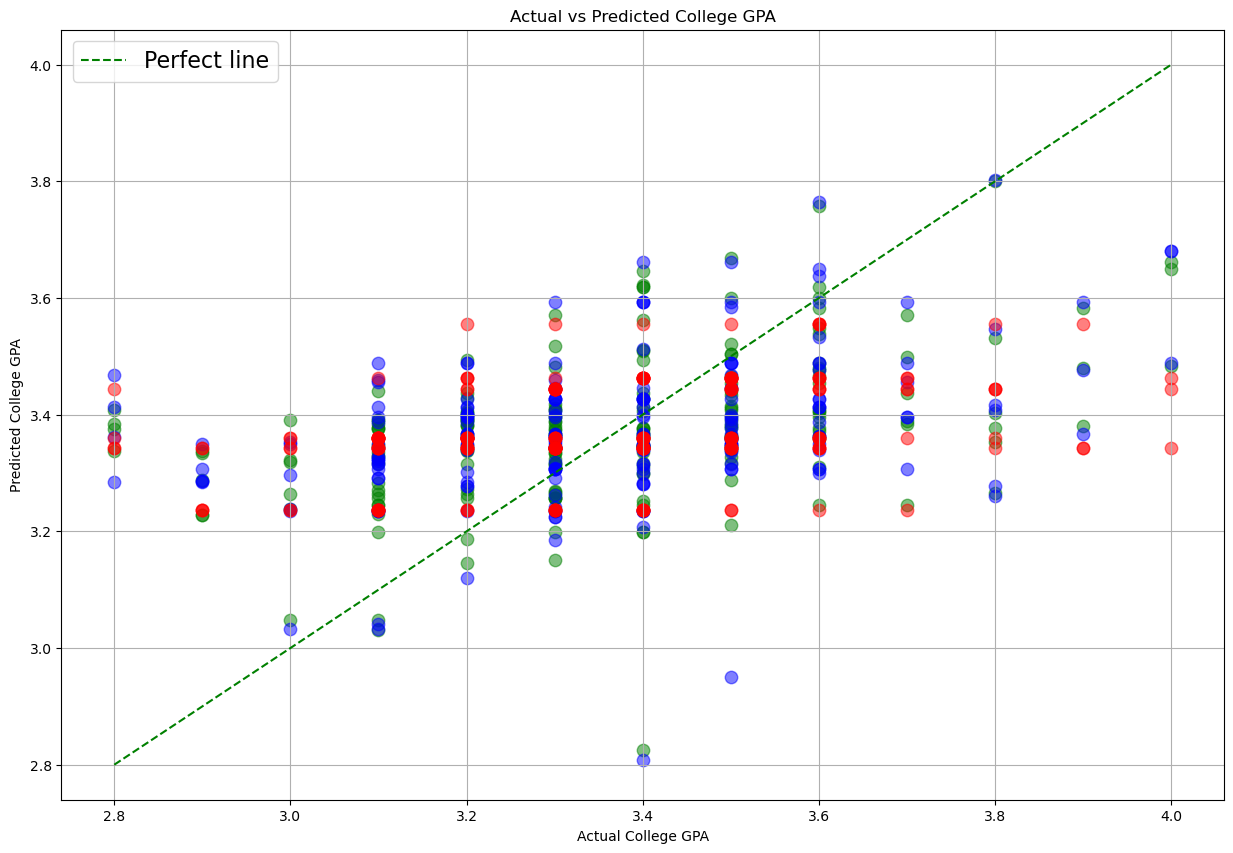

In [57]:
point_size = 80
marker = "o"
transparent = 0.5

plt.figure(figsize=(15, 10))

plt.plot(
    [min(y_test_gpa), max(y_test_gpa)],
    [min(y_test_gpa), max(y_test_gpa)],
    color="green",
    linestyle="--",
    label = "Perfect line"
)

plt.scatter(
    y_test_gpa,
    y_pred_gpa,
    color="green",
    s=point_size,
    marker=marker,
    alpha=transparent,
)

plt.scatter(
    y_test_gpa,
    y_pred_gpa_income,
    color="blue",
    s=point_size,
    marker=marker,
    alpha=transparent,
)

plt.scatter(
    y_test_gpa,
    y_pred_gpa_edu,
    color="red",
    s=point_size,
    marker=marker,
    alpha=transparent,
)

plt.xlabel("Actual College GPA")
plt.ylabel("Predicted College GPA")
plt.title("Actual vs Predicted College GPA")
plt.legend(loc="upper left", fontsize="16")
plt.grid(True)
plt.show()


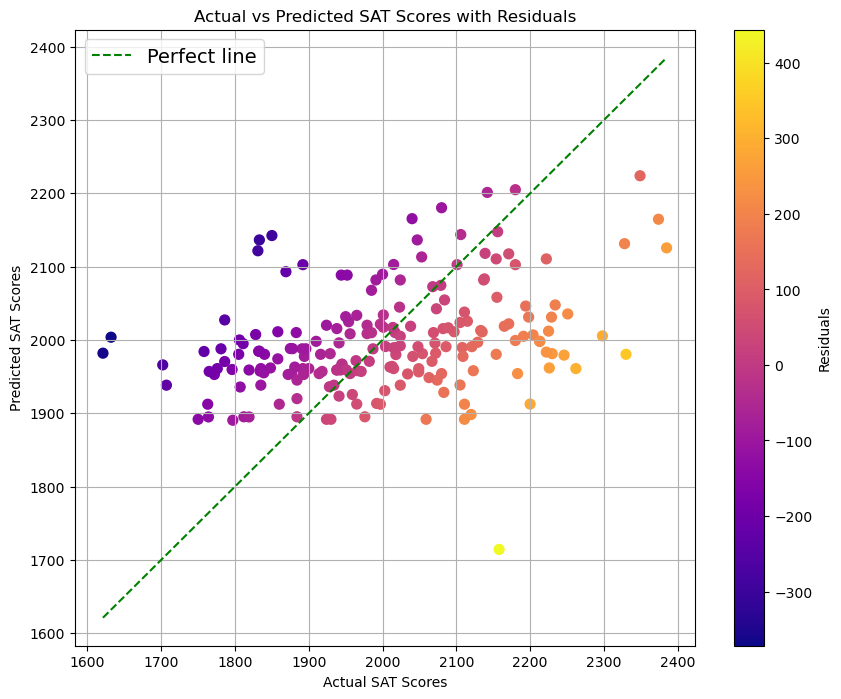

In [58]:
residuals_sat = y_test_sat - y_pred_sat
plt.figure(figsize=(10, 8))
plt.scatter(y_test_sat, y_pred_sat, c=residuals_sat, cmap='plasma', s=50)
plt.colorbar(label='Residuals')
plt.plot(
    [min(y_test_sat), max(y_test_sat)],
    [min(y_test_sat), max(y_test_sat)],
    color="green",
    linestyle="--",
    label = "Perfect line",
)
plt.xlabel("Actual SAT Scores")
plt.ylabel("Predicted SAT Scores")
plt.title("Actual vs Predicted SAT Scores with Residuals")
plt.legend(loc="upper left", fontsize="14")
plt.grid(True)
plt.show()

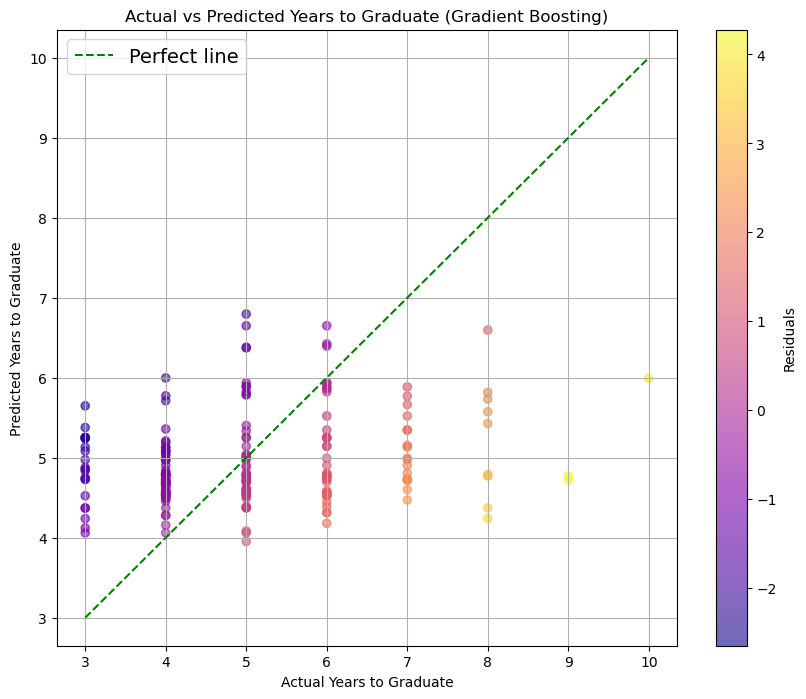

In [59]:
residuals_years_gb = y_test_years - y_pred_years

plt.figure(figsize=(10, 8))
plt.scatter(y_test_years, y_pred_years, c=residuals_years_gb, cmap='plasma', alpha=0.6)
plt.colorbar(label='Residuals')
plt.plot(
    [min(y_test_years), max(y_test_years)],
    [min(y_test_years), max(y_test_years)],
    color="green",
    linestyle="--",
    label = "Perfect line",
)
plt.xlabel("Actual Years to Graduate")
plt.ylabel("Predicted Years to Graduate")
plt.title("Actual vs Predicted Years to Graduate (Gradient Boosting)")
plt.legend(loc="upper left", fontsize="14")
plt.grid(True)
plt.show()

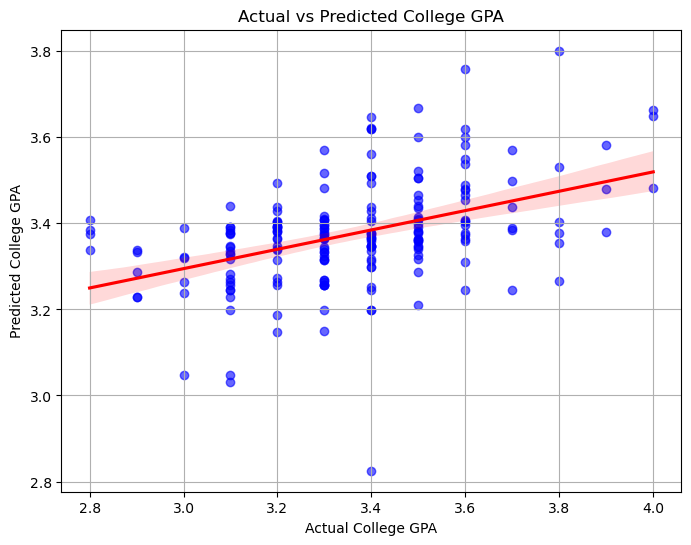

In [60]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_gpa, y=y_pred_gpa, scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red'})
plt.xlabel("Actual College GPA")
plt.ylabel("Predicted College GPA")
plt.title("Actual vs Predicted College GPA")
plt.grid(True)
plt.show()

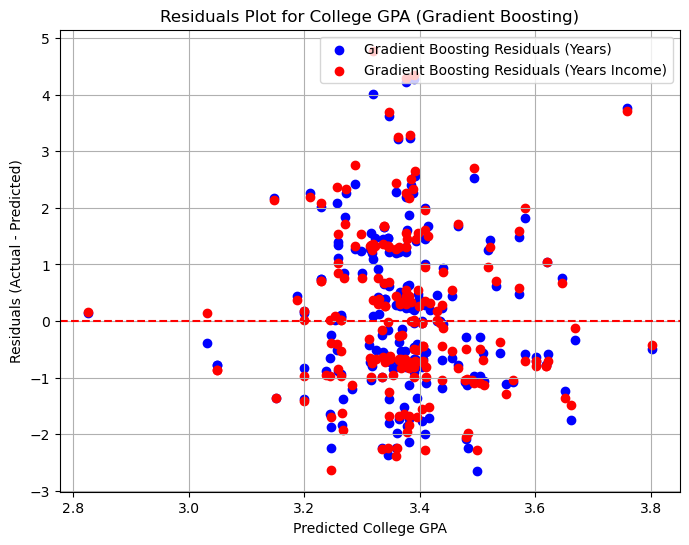

In [61]:
residuals_gpa_gb = y_test_gpa - y_pred_gpa
residuals_sat_gb = y_test_sat - y_pred_sat
residuals_years_gb = y_test_years - y_pred_years
residuals_years_income_gb = y_test_years - y_pred_years_income  # Include "Years Income" residuals for Gradient Boosting

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_gpa, residuals_years_gb, color="blue", label="Gradient Boosting Residuals (Years)")
plt.scatter(y_pred_gpa, residuals_years_income_gb, color="red", label="Gradient Boosting Residuals (Years Income)")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted College GPA")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot for College GPA (Gradient Boosting)")
plt.legend()
plt.grid(True)
plt.show()

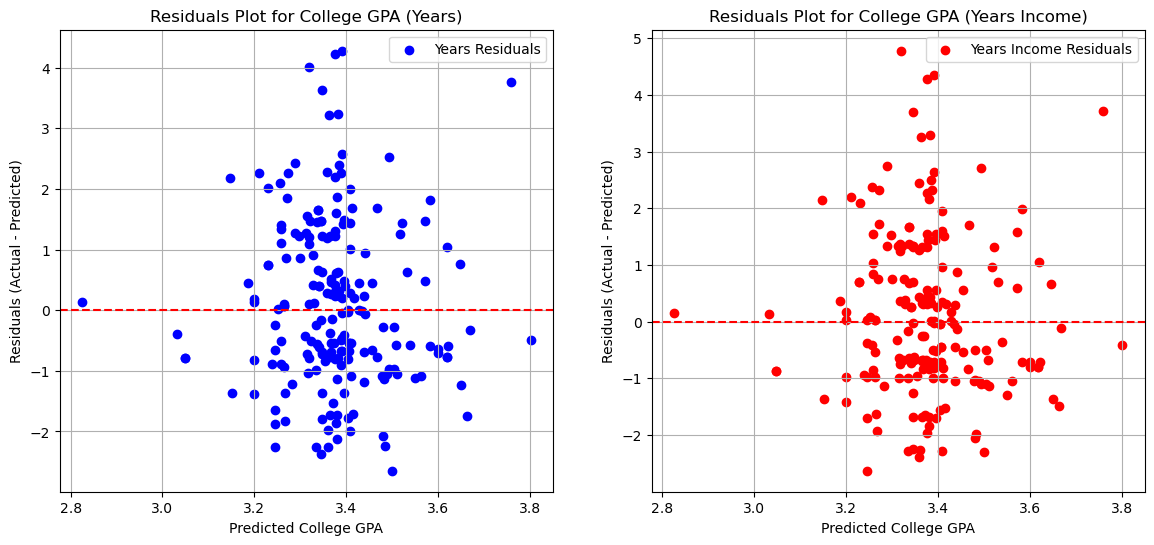

In [62]:
residuals_gpa = y_test_gpa - y_pred_gpa
residuals_sat = y_test_sat - y_pred_sat
residuals_years = y_test_years - y_pred_years

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(y_pred_gpa, residuals_years, color="blue", label="Years Residuals")
ax1.axhline(y=0, color="red", linestyle="--")
ax1.set_xlabel("Predicted College GPA")
ax1.set_ylabel("Residuals (Actual - Predicted)")
ax1.set_title("Residuals Plot for College GPA (Years)")
ax1.legend()
ax1.grid(True)

residuals_years_income = y_test_years - y_pred_years_income
ax2.scatter(y_pred_gpa, residuals_years_income, color="red", label="Years Income Residuals")
ax2.axhline(y=0, color="red", linestyle="--")
ax2.set_xlabel("Predicted College GPA")
ax2.set_ylabel("Residuals (Actual - Predicted)")
ax2.set_title("Residuals Plot for College GPA (Years Income)")
ax2.legend()
ax2.grid(True)

plt.show()

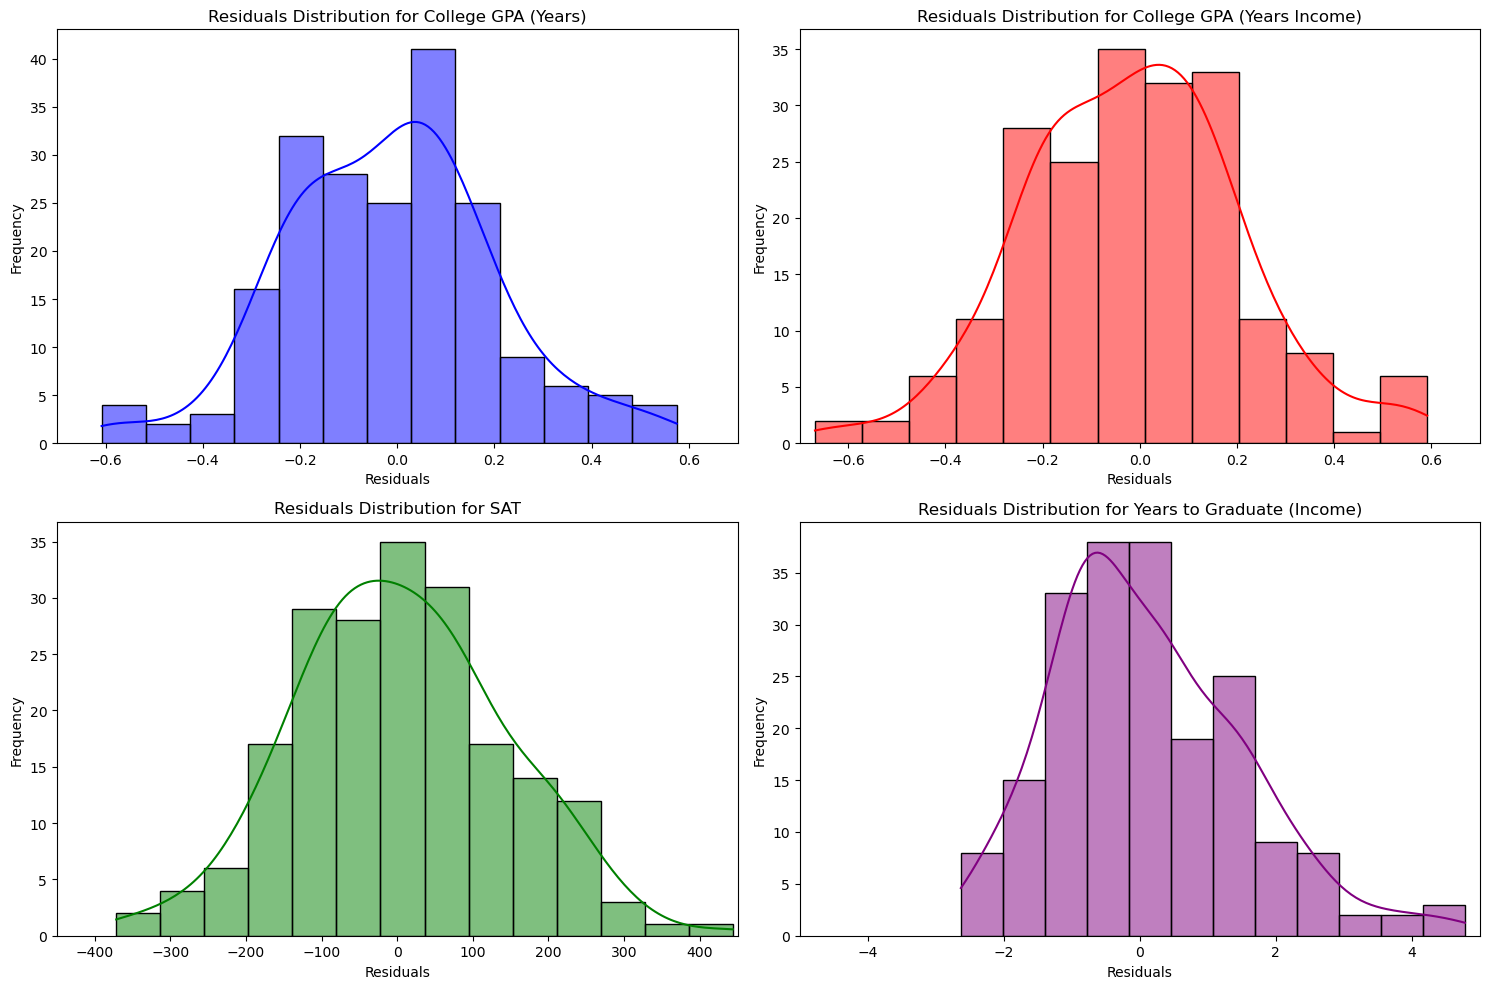

In [63]:
plt.figure(figsize=(15, 10))

# Residuals for College GPA (Years)
plt.subplot(2, 2, 1)
sns.histplot(y_test_gpa - y_pred_gpa, kde=True, color="blue")
plt.title("Residuals Distribution for College GPA (Years)")
plt.xlim(-0.7, 0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Residuals for College GPA (Years Income)
plt.subplot(2, 2, 2)
sns.histplot(y_test_gpa - y_pred_gpa_income, kde=True, color="red")
plt.title("Residuals Distribution for College GPA (Years Income)")
plt.xlim(-0.7, 0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Residuals for SAT
plt.subplot(2, 2, 3)
sns.histplot(y_test_sat - y_pred_sat, kde=True, color="green")
plt.title("Residuals Distribution for SAT")
plt.xlim(-450, 450)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Residuals for Years to Graduate (Income)
plt.subplot(2, 2, 4)
sns.histplot(y_test_years - y_pred_years_income, kde=True, color="purple")
plt.title("Residuals Distribution for Years to Graduate (Income)")
plt.xlim(-5, 5)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()